In [25]:
# IMPLEMENTACION DE Synthetic Minority Oversampling Technique (SMOTE)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from imblearn.over_sampling import  RandomOverSampler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn .metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import metrics
%matplotlib inline
datos_url= "C://Users/maxib/Source/repos/proyecto_final_coder/datos/Base_predictive_maintenance.csv"

In [2]:
# Leer .csv y creo un DF
df = pd.read_csv(datos_url, delimiter=",", index_col= ["UDI", "Product_ID"])
df.head()

,,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target,Failure_Type
UDI,Product_ID,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Over-sampling variables target

## Variable Target

In [4]:
# Preparamos variable Target para entrenar los algoritmos
X= df.drop(["Target","Type","Failure_Type"], axis=1) 
y= df["Target"]
# instantiating the random over sampler 
ros = RandomOverSampler(sampling_strategy=0.5)
# resampling X, y
X_ros_Target, y_ros_Target = ros.fit_resample(X, y)
# new class distribution 
y_ros_Target.value_counts()
X_ros_Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14491 entries, 0 to 14490
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature_[K]      14491 non-null  float64
 1   Process_temperature_[K]  14491 non-null  float64
 2   Rotational_speed_[rpm]   14491 non-null  int64  
 3   Torque_[Nm]              14491 non-null  float64
 4   Tool_wear_[min]          14491 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 566.2 KB


## Variable Failure_Type

In [5]:
# Preparamos variable Target para entrenar los algoritmos.
X= df.drop(["Type","Failure_Type"], axis=1) 
y= df["Failure_Type"]
# instantiating the random over sampler 
ros = RandomOverSampler(sampling_strategy={"Heat Dissipation Failure":1000,"Random Failures":1000,"Tool Wear Failure":1000,
                                            "Overstrain Failure":1000, "Power Failure":1000})
# resampling X, y
X_ros_failure, y_ros_failure = ros.fit_resample(X, y)
y_ros_failure.value_counts()
X_ros_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature_[K]      14652 non-null  float64
 1   Process_temperature_[K]  14652 non-null  float64
 2   Rotational_speed_[rpm]   14652 non-null  int64  
 3   Torque_[Nm]              14652 non-null  float64
 4   Tool_wear_[min]          14652 non-null  int64  
 5   Target                   14652 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 686.9 KB


# TREE CLASIFIER

In [3]:
                        ###############################################
                        ## Implementacion de Decision Tree Clasifier ##
                        ###############################################

## Variable Target

Deberia modificar la variable Type con valores STR para utilizarlo dentro del TREE?

% de aciertos sobre el set de entrenamiento: 0.9690842591953627
% de aciertos sobre el set de evaluación: 0.9714


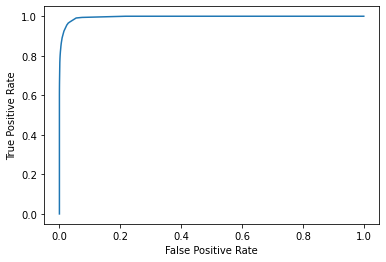

Auc para nuestro modelo es 0.9678068510068978
Auc para nuestro modelo es 0.9681201583228984


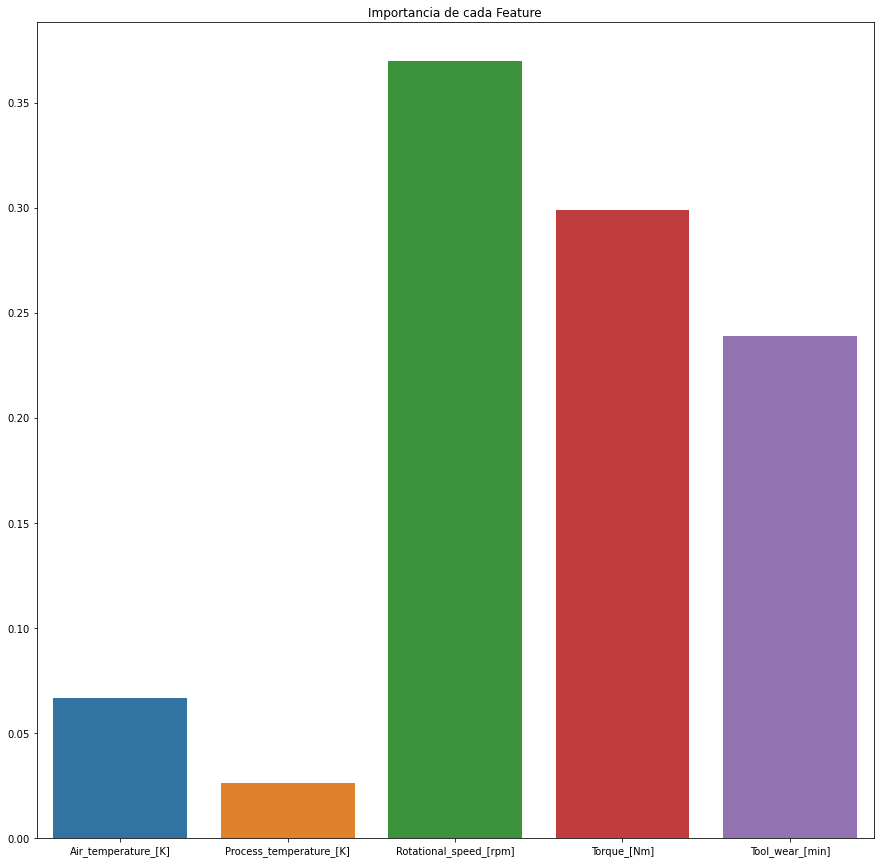

In [29]:
                        #####################
                        ## Variable Target ##
                        #####################
                        
X_target_test= df.drop(["Target","Type","Failure_Type"], axis=1) 
y_target_test= df["Target"]
# Creamos el modelo
tree = DecisionTreeClassifier(max_depth=8, random_state = 42)
# Entrenamos el algoritmo
tree.fit(X_ros_Target, y_ros_Target)
# Prediccion en Train
y_train_pred = tree.predict(X_ros_Target)
# Prediccion en Test
y_test_pred = tree.predict(X_target_test)
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_ros_Target, y_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_target_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
# Graficamos ROC
y_pred_proba= tree.predict_proba(X_target_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_target_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Calculamos AUC
# TRAIN AUC
auc= roc_auc_score(y_ros_Target, y_train_pred)
# TEST AUC
auc_2= roc_auc_score(y_target_test, y_test_pred)
print("TRAIN Auc para nuestro modelo es {}". format(auc))
print("TEST Auc para nuestro modelo es {}". format(auc_2))
# Peso de las variables
plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X_target_test.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## Variable Failure_Type

In [48]:
                        ###########################
                        ## Variable Failure_Type ##
                        ###########################
                        
X_failure_test= df.drop(["Type","Failure_Type"], axis=1) 
y_failure_test= df["Failure_Type"]
#Creamos el modelo
tree_2 = DecisionTreeClassifier(max_depth=8, random_state = 42)
# UNO CONTRA EL RESTO
model = OneVsRestClassifier(tree_2)
#Entrenamos el algoritmo
model.fit(X_ros_failure, y_ros_failure)
# Prediccion en Train
y_train_pred = model.predict(X_ros_failure)
# Prediccion en Test
y_test_pred = model.predict(X_failure_test)
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_ros_failure, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_failure_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

"""
#ROC y AUC
fpr= dict()
tpr= dict()
roc_auc= dict()
num_clases= model.n_classes_
for i in range(num_clases):
    fpr[i], tpr[i], _= roc_curve(y_test_pred[i], model.predict_proba(X_failure_test)[:,i])
    print("OK")
    roc_auc[i] = auc(fpr[i], tpr[i])
# Graficamos ROC
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
"""

% de aciertos sobre el set de entrenamiento: 0.9827327327327328
% de aciertos sobre el set de evaluación: 0.9976


'\n#ROC y AUC\nfpr= dict()\ntpr= dict()\nroc_auc= dict()\nnum_clases= model.n_classes_\nfor i in range(num_clases):\n    fpr[i], tpr[i], _= roc_curve(y_test_pred[i], model.predict_proba(X_failure_test)[:,i])\n    print("OK")\n    roc_auc[i] = auc(fpr[i], tpr[i])\n# Graficamos ROC\n# Plot of a ROC curve for a specific class\nfor i in range(n_classes):\n    plt.figure()\n    plt.plot(fpr[i], tpr[i], label=\'ROC curve (area = %0.2f)\' % roc_auc[i])\n    plt.plot([0, 1], [0, 1], \'k--\')\n    plt.xlim([0.0, 1.0])\n    plt.ylim([0.0, 1.05])\n    plt.xlabel(\'False Positive Rate\')\n    plt.ylabel(\'True Positive Rate\')\n    plt.title(\'Receiver operating characteristic example\')\n    plt.legend(loc="lower right")\n    plt.show()\n'

# RANDOM FOREST

## Variable Target

% de aciertos sobre el set de evaluación: 1.0
% de aciertos sobre el set de evaluación: 1.0


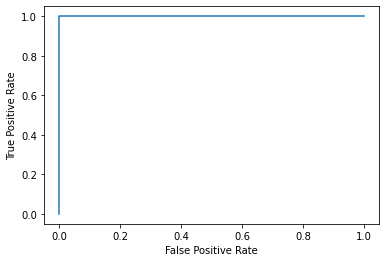

TRAIN Auc para nuestro modelo es 1.0
TEST Auc para nuestro modelo es 1.0


In [47]:
                    #####################################
                    ## Implementacion de Random Forest ##
                    #####################################


# Variable Target

# Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_ros_Target, y_ros_Target)
# Prediccion en Train (OVERSAMPLING)
y_train_pred = model.predict(X_ros_Target)
train_accuracy = accuracy_score(y_ros_Target, y_train_pred)
print('% de aciertos sobre el set de evaluación:',train_accuracy)

#Prediccion en Test (ORIGINAL)
y_test_pred = model.predict(X_target_test) 
test_accuracy = accuracy_score(y_target_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

# Graficamos ROC
y_pred_proba= model.predict_proba(X_target_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_target_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Calculamos AUC
# TRAIN AUC
auc= roc_auc_score(y_ros_Target, y_train_pred)
# TEST AUC
auc_2= roc_auc_score(y_target_test, y_test_pred)
print("TRAIN Auc para nuestro modelo es {}". format(auc))
print("TEST Auc para nuestro modelo es {}". format(auc_2))

## Variable Failure_Type

In [14]:
# Variable Failure_Type
# Creamos un random forest!
rf= RandomForestClassifier(random_state=11,
                               n_estimators=200,
                               class_weight="balanced", 
                               max_features="log2",
                               max_depth=8)
# UNO VS EL RESTO
model= OneVsRestClassifier(rf)
model.fit(X_ros_failure, y_ros_failure)

# Prediccion en Train
y_train_pred= model.predict(X_ros_failure) 
train_accuracy= accuracy_score(y_ros_failure, y_train_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)
# Prediccion en Test
y_test_pred = model.predict(X_failure_test) 
test_accuracy = accuracy_score(y_failure_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9978159978159978
% de aciertos sobre el set de evaluación: 0.9968
